# Margaret Doyle
margaret.doyle@berkeley.edu


HW4: Parallelism

due Tuesday Feb 22, 2022 


# #Problem 1 

In [28]:
%%writefile prob1.py
from random import uniform
from math import sqrt
from time import time 
from dask import delayed
import argparse
import multiprocessing 
from concurrent.futures import ProcessPoolExecutor


#Dart throwing function 
def dart(number_of_darts):
    number_of_darts_in_circle= 0 
    x,y=uniform(0,1), uniform(0,1)
    if sqrt((x-0.5)**2 + (y-0.5)**2) <=0.5:
        number_of_darts_in_circle +=1
    return (number_of_darts_in_circle)

#Delayed dart throwing function to use with Dask 
@delayed(pure=True)
def dart_delayed(number_of_darts):
    number_of_darts_in_circle= 0 
    for x in range(number_of_darts):
        x,y=uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2 + (y-0.5)**2) <=0.5:
            number_of_darts_in_circle +=1
    return number_of_darts_in_circle 

#Delayed addition function to use with dasks
@delayed(pure=True)
def add(x, y, z):
    return x + y + z

#Function for experimenting with simple serial, multiprocessing and dask 
def throw_in_parallel(nthrow):
    print("%d darts" %nthrow)
    ##################
    print('##Multiprocessing##')
    number_of_darts_in_circle = 0
    pools = multiprocessing.Pool(processes=multiprocessing.cpu_count())
    start = time()
    results = pools.map(dart,range(nthrow))
    totaldart = sum(results)
    end=time()
    execution_time=end - start
    pi_approx = 4 *  totaldart / float(nthrow)
    print(f"Finished in {execution_time} sec")
    print("Num darts hit = ",  totaldart)
    print("Pi approx:", pi_approx)
    print("Darts thrown per second:" , nthrow / execution_time)

   ##################
    print('##Simple Serial##')
    number_of_darts_in_circle = 0
    start = time()
    results = []
    for x in range(nthrow):
        results.append(dart(x))
    totaldart = sum(results)
    end= time()
    execution_time= end - start
    pi_approx = 4 *  totaldart / float(nthrow)
    print(f"Finished in {execution_time} sec")
    print("Num darts hit = ", totaldart)
    print("Pi approx:", pi_approx)
    print("Darts thrown per second:" , nthrow / execution_time)

       ##################
    print('##Dask##')
    number_of_darts_in_circle = 0
    start = time()
    
    #Split up manually into three chunks
    values1 = (dart_delayed(int(nthrow/3)))
    values2 = (dart_delayed(int(nthrow/3)))
    values3 = (dart_delayed(nthrow -2*int(nthrow/3)))
    values4 = add(values1,values2,values3)
    results = values4.compute()
    end= time()
    execution_time = end - start
    pi_approx = 4 *  results / float(nthrow)
    print(f"Finished in {execution_time} sec")
    print("Num darts hit = ",results)
    print("Pi approx:", pi_approx)
    print("Darts thrown per second:" , nthrow / execution_time)
    print('\n')

if __name__ == "__main__":
    #Allow user to input number of darts
    parser = argparse.ArgumentParser(description='Sample Application')
    parser.add_argument('-s', action='store', dest='num_throws',
                    help='Store a simple value')
    results = parser.parse_args()
    nthrow = results.num_throws
    nthrow = int(nthrow)

throw_in_parallel(nthrow)
  

Overwriting prob1.py


# Experimenting with various dart numbers

In [31]:
!python prob1.py -s 10
!python prob1.py -s 10000
!python prob1.py -s 100000
!python prob1.py -s 100000000

10 darts
##Multiprocessing##
Finished in 0.0016820430755615234 sec
Num darts hit =  7
Pi approx: 2.8
Darts thrown per second: 5945.15095676825
##Simple Serial##
Finished in 4.601478576660156e-05 sec
Num darts hit =  9
Pi approx: 3.6
Darts thrown per second: 217321.45077720206
##Dask##
Finished in 0.005259990692138672 sec
Num darts hit =  8
Pi approx: 3.2
Darts thrown per second: 1901.1440485903363


10000 darts
##Multiprocessing##
Finished in 0.005856037139892578 sec
Num darts hit =  7896
Pi approx: 3.1584
Darts thrown per second: 1707639.4430420976
##Simple Serial##
Finished in 0.007805824279785156 sec
Num darts hit =  7847
Pi approx: 3.1388
Darts thrown per second: 1281094.685400122
##Dask##
Finished in 0.009447097778320312 sec
Num darts hit =  7907
Pi approx: 3.1628
Darts thrown per second: 1058526.1457702403


100000 darts
##Multiprocessing##
Finished in 0.05083894729614258 sec
Num darts hit =  78587
Pi approx: 3.14348
Darts thrown per second: 1966995.8824577695
##Simple Serial##
F

# #Problem 2, plotting execution time as function of number of darts 

In [34]:
con_time_all = []
serial_time_all = []
dask_time_all =[]
serial_rate_all=[]
con_rate_all=[]
dask_rate_all =[]
darts =[]

for x in [10, 100,1000,   10000, 100000, 1000000, 10000000]:

    a = !python prob1.py -s $x
    darts.append(x)

    #Split up and store output for plotting 
    con_time = float(a[2].split()[2])
    serial_time = float(a[7].split()[2])
    dask_time = float(a[12].split()[2])

    con_rate = float(a[5].split()[4])
    serial_rate =float(a[10].split()[4])
    dask_rate = float(a[15].split()[4])

    con_time_all.append(con_time)
    serial_time_all.append(serial_time)
    dask_time_all.append(dask_time)
    
    con_rate_all.append(con_rate)
    serial_rate_all.append(serial_rate)
    dask_rate_all.append(dask_rate)
    

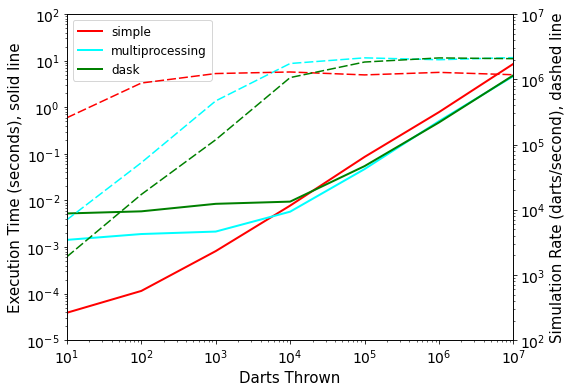

Processor: 3.5 GHz Dual-Core Intel Core i7, 4 'cores' 


In [35]:
import matplotlib.pyplot as plt
import multiprocessing
fig, ax1 = plt.subplots(figsize=[8,6])
ax2 = ax1.twinx()
ax1.plot(darts,serial_time_all, color = 'red', linewidth=2, label ='simple')
ax1.plot(darts,con_time_all, color='cyan' ,linewidth=2, label = 'multiprocessing')
ax1.plot(darts,dask_time_all, color='green',linewidth=2, label='dask')


ax2.plot(darts,con_rate_all, dashes=[6, 2], color='cyan' )
ax2.plot(darts,serial_rate_all, dashes=[6, 2], color = 'red')
ax2.plot(darts,dask_rate_all,  dashes=[6, 2],  color='green',)

ax1.set_ylabel('Execution Time (seconds), solid line',fontsize=15)
ax2.set_ylabel('Simulation Rate (darts/second), dashed line',fontsize=15)
ax1.loglog()
ax2.loglog()

ax1.set_ylim(1e-5, 1e2)
ax2.set_ylim(1e2, 1e7)
ax1.set_xlim(1e1, 1e7)
ax1.set_xlabel('Darts Thrown',fontsize=15)
ax1.legend(loc='upper left',fontsize=12)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.show()
print("Processor: 3.5 GHz Dual-Core Intel Core i7, %d 'cores' " %multiprocessing.cpu_count())

**Behavior of plot** : Written in README File 

# #Problem 3, Write a short narrative explaining the differences and advantages between the approaches.

When dealing with a smaller number of tasks (n < 1e4), simple serial will be the most efficient method to use(faser than a ~1 ms) . This is due to the fact that both dask and multiprocessing require additional indirect time which is dedicated towards preparing the calculation before execution. Since this overhead time can add up, the benefits of parallelization will really only outweigh the cost of this overhead time once the calculation grow large enough (n > 1e4), at which point the improvements in rate and execution time of both dask and multiprocessing begin to show a slight improvement over simple serial. 


For small n , multiprocessing starts out faster than dask. However, once n > 1e5, both methods appear to operate at roughly the same rate. 

In [37]:
con_time_all

[0.001422882080078125,
 0.0018990039825439453,
 0.0021448135375976562,
 0.005731821060180664,
 0.0469512939453125,
 0.5018577575683594,
 4.649638891220093]

In [38]:
dask_time_all

[0.005249977111816406,
 0.005831003189086914,
 0.008450984954833984,
 0.009421110153198242,
 0.05441474914550781,
 0.47069287300109863,
 4.83413290977478]

In [39]:
serial_time_all

[3.886222839355469e-05,
 0.00011420249938964844,
 0.0008170604705810547,
 0.007731914520263672,
 0.08570718765258789,
 0.7838609218597412,
 8.520324945449829]